# Block Finder Diagnostics

In this notebook, we'll look at various block finding strategies, and compare their average variances and entanglements.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import *

In [57]:
def get_block_data(L, l, W_list, e, num_dis, data_dir, dmrg_data_dir, tol=.5):
    num_W = len(W_list)
    var_list     = np.zeros(num_W)
    log_var_list = np.zeros(num_W)
    EE_list      = np.zeros(num_W)
    ep_list      = np.zeros(num_W)
    ep_scatter_list = []
   
    var_std_list     = np.zeros(num_W)
    log_var_std_list = np.zeros(num_W)
    EE_std_list      = np.zeros(num_W)
    ep_std_list      = np.zeros(num_W)
    for W_idx,W in enumerate(W_list):
        tEE, tvar, tlogvar, tep = [], [], [], []
        for dis in range(num_dis):
            E, var, EE, _ = load_diagnostics(L, l, W, e, dis, data_dir)
            E_min, E_max  = get_dmrg_minmax_energies(L, W, dis, dmrg_data_dir)
            ep = sqrt(var)/(E_max - E_min)
            epsilon = (E - E_min)/(E_max - E_min)
            if np.abs(epsilon - .5) <= tol:
                tEE.append(EE)
                tvar.append(var)
                tep.append(ep)
                tlogvar.append(np.log10(var))

                ep_scatter_list.append((W, epsilon))
        
        var_list[W_idx]     = np.mean(tvar)
        EE_list[W_idx]      = np.mean(tEE)
        log_var_list[W_idx] = np.mean(tlogvar)
        ep_list[W_idx]      = np.mean(tep)
        
        var_std_list[W_idx]     = np.std(tvar)   /np.sqrt(len(tvar))
        log_var_std_list[W_idx] = np.std(tlogvar)/np.sqrt(len(tlogvar))
        EE_std_list[W_idx]      = np.std(tEE)    /np.sqrt(len(tEE))
        ep_std_list[W_idx]      = np.std(tep)    /np.sqrt(len(tep))
        
    return ep_scatter_list, ep_list, var_list, log_var_list, EE_list, ep_std_list, var_std_list, log_var_std_list, EE_std_list

In [60]:
L = 64
l = 4
W_list = [0.0001] + list(range(1,11))
W_list += [0.33, 0.66, 1.33, 1.66, 2.33, 2.66, 3.33, 3.66, 4.33, 4.66, 5.33]
W_list.sort()
num_dis = 100
dmrg_data_dir    = "../dmrg/"
block_finder_dir = "../block_finder_data/"
tol=.5

min_ent_dir     = block_finder_dir + "min_entanglement_data/"
min_ent2_dir    = block_finder_dir + "min_entanglement2_data/"
random_dir      = block_finder_dir + "random_data/"
first_block_dir = block_finder_dir + "first_block_data/"
max_gap_dir     = block_finder_dir + "maxgap_data/"

e1_s, ep1, var1, logvar1, EE1, ep1_std, var1_std, log_var1_std, EE1_std = get_block_data(L, l, W_list, 1, num_dis, min_ent_dir, dmrg_data_dir, tol)
e2_s, ep2, var2, logvar2, EE2, ep2_std, var2_std, log_var2_std, EE2_std = get_block_data(L, l, W_list, 1, num_dis, min_ent2_dir, dmrg_data_dir, tol)
e3_s, ep3, var3, logvar3, EE3, ep3_std, var3_std, log_var3_std, EE3_std = get_block_data(L, l, W_list, 1, num_dis, random_dir, dmrg_data_dir, tol)
e4_s, ep4, var4, logvar4, EE4, ep4_std, var4_std, log_var4_std, EE4_std = get_block_data(L, l, W_list, 1, num_dis, first_block_dir, dmrg_data_dir, tol)
e5_s, ep5, var5, logvar5, EE5, ep5_std, var5_std, log_var5_std, EE5_std = get_block_data(L, l, W_list, 1, num_dis, max_gap_dir, dmrg_data_dir, tol)

<IPython.core.display.Javascript object>


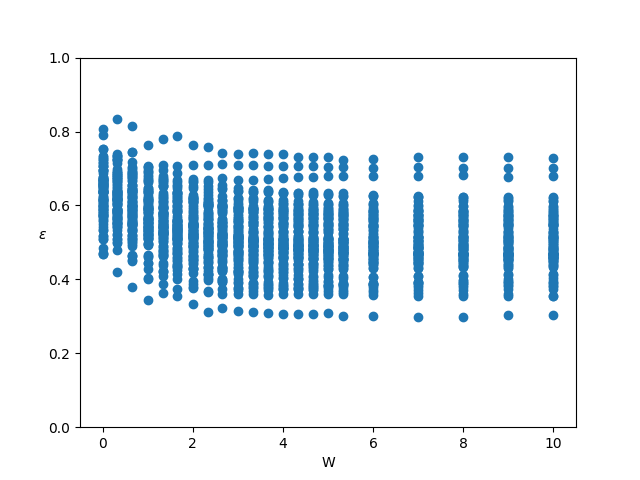

In [72]:
%matplotlib notebook
X, Y = list(zip(*e5_s))
plt.scatter(X, Y)
plt.ylim(.5-tol,.5+tol)
plt.xlabel("W")
plt.ylabel(r"$\epsilon$", rotation=0)
plt.show()

<IPython.core.display.Javascript object>


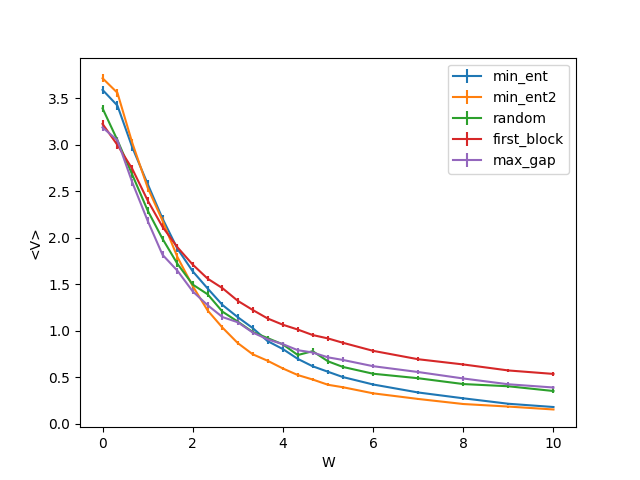

In [75]:
%matplotlib notebook

plt.errorbar(W_list, var1, yerr=var1_std, label="min_ent")
plt.errorbar(W_list, var2, yerr=var2_std, label="min_ent2")
plt.errorbar(W_list, var3, yerr=var3_std, label="random")
plt.errorbar(W_list, var4, yerr=var4_std, label="first_block")
plt.errorbar(W_list, var5, yerr=var5_std, label="max_gap")
plt.xlabel("W")
plt.ylabel("<V>", rotation=90)
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


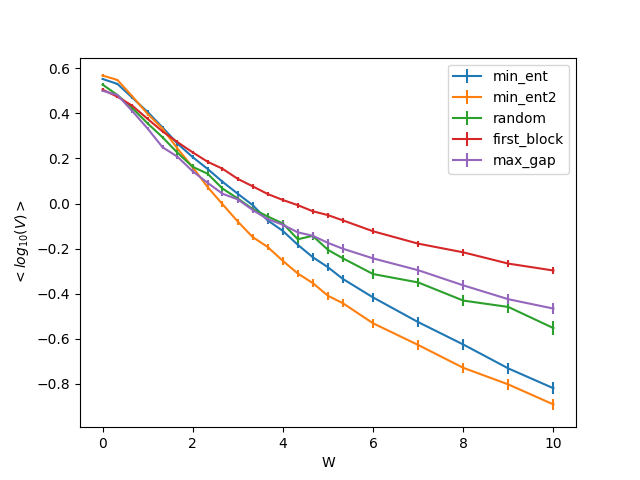

In [63]:
%matplotlib notebook

plt.errorbar(W_list, logvar1, yerr=log_var1_std, label="min_ent")
plt.errorbar(W_list, logvar2, yerr=log_var2_std, label="min_ent2")
plt.errorbar(W_list, logvar3, yerr=log_var3_std, label="random")
plt.errorbar(W_list, logvar4, yerr=log_var4_std, label="first_block")
plt.errorbar(W_list, logvar5, yerr=log_var5_std, label="max_gap")
plt.xlabel("W")
plt.ylabel(r"${<log_{10}(V)>}$")
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


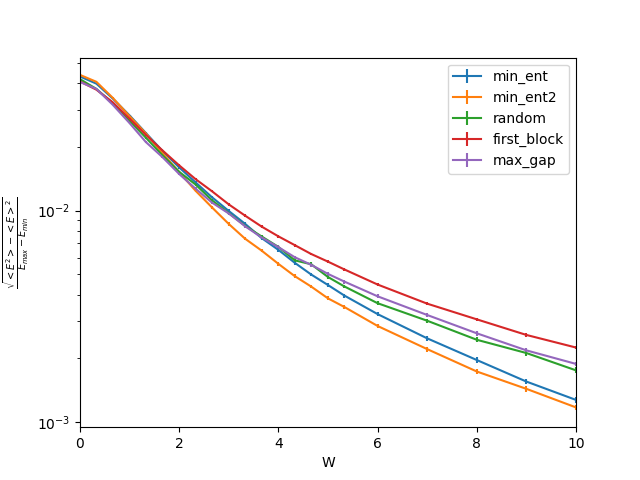

In [64]:
%matplotlib notebook

plt.errorbar(W_list, ep1, yerr=ep1_std, label="min_ent")
plt.errorbar(W_list, ep2, yerr=ep2_std, label="min_ent2")
plt.errorbar(W_list, ep3, yerr=ep3_std, label="random")
plt.errorbar(W_list, ep4, yerr=ep4_std, label="first_block")
plt.errorbar(W_list, ep5, yerr=ep5_std, label="max_gap")
plt.yscale("log")
plt.xlabel("W")
plt.ylabel(r"$\frac{\sqrt{<E^{2}>-<E>^{2}}}{E_{max}-E_{min}}$")
plt.xlim(0, W_list[-1])
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


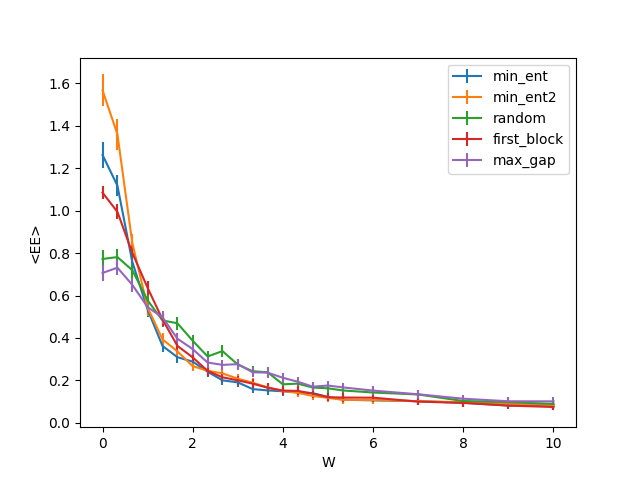

In [66]:
%matplotlib notebook

plt.errorbar(W_list, EE1, yerr=EE1_std, label="min_ent")
plt.errorbar(W_list, EE2, yerr=EE2_std, label="min_ent2")
plt.errorbar(W_list, EE3, yerr=EE3_std, label="random")
plt.errorbar(W_list, EE4, yerr=EE4_std, label="first_block")
plt.errorbar(W_list, EE5, yerr=EE5_std, label="max_gap")
plt.xlabel("W")
plt.ylabel("<EE>")
plt.legend(loc='best')
plt.show()